In [1]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)
C:\Users\chris\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


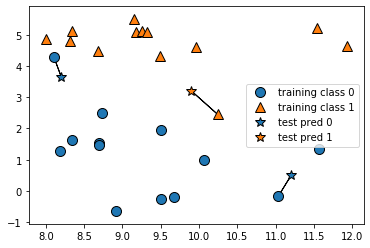

In [3]:
# k-Nearest Neighbors
mglearn.plots.plot_knn_classification(n_neighbors=1)

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


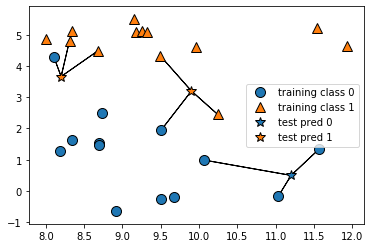

In [4]:
mglearn.plots.plot_knn_classification(n_neighbors=3)

In [5]:
# k-nearest neighbors application
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

C:\Users\chris\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:85: DeprecationWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=DeprecationWarning)


In [6]:
# import and instantiate k neighbors algorithm
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)

In [7]:
# train algorithm on data
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [8]:
print("Test set predictions:", clf.predict(X_test))

Test set predictions: [1 0 1 0 1 0 0]


In [9]:
# check accuracy
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set accuracy: 0.86


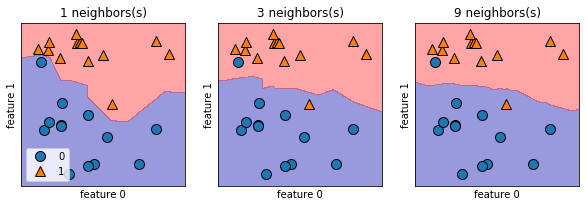

In [10]:
# demonstrate decision boundaries
fig, axes = plt.subplots(1,3, figsize=(10,3))

for n_neighbors, ax in zip([1,3,9], axes):
    # the fit method returns the object self, so we can instantiate and fit in one line
    clf = KNeighborsClassifier(n_neighbors = n_neighbors).fit(X,y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=0.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbors(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

In [11]:
# left figure follows training data closely.  A smoother boundary line corresponds to a simpler model.
# Therefore using fewer neighbors corresponds to a high model 

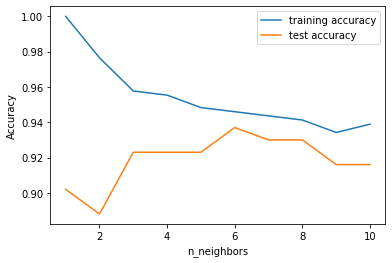

In [12]:
# lets investigate whether we can confirm the connection between model complexity and generalization that we discussed earlier.
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1,11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
     
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    
    #record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

    

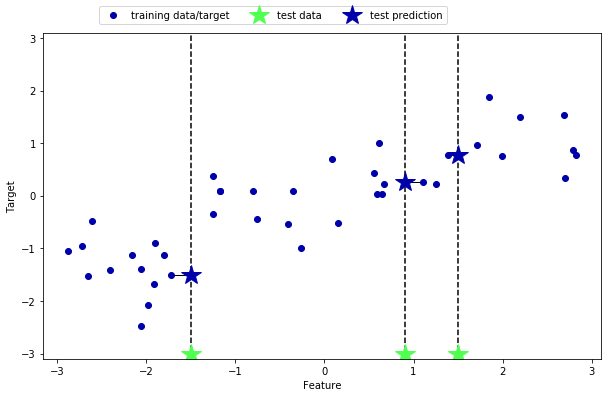

In [13]:
# k-neighbors regression
mglearn.plots.plot_knn_regression(n_neighbors=1)

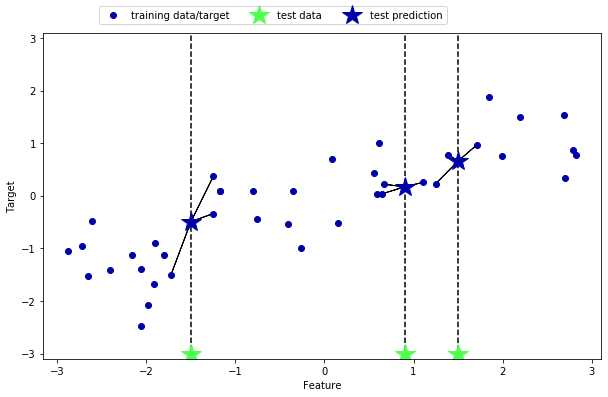

In [14]:
mglearn.plots.plot_knn_regression(n_neighbors=3)

In [15]:
from sklearn.neighbors import KNeighborsRegressor
X, y = mglearn.datasets.make_wave(n_samples=40)

# split the wave dataset into a training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)


# instantiate the model and set hte number of neighbors to consider to 3
reg = KNeighborsRegressor(n_neighbors=3)

# fit the model using the training data and training targets
reg.fit(X_train, y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                    weights='uniform')

In [16]:
print("Test set predictions:\n", reg.predict(X_test))

Test set predictions:
 [-0.05396539  0.35686046  1.13671923 -1.89415682 -1.13881398 -1.63113382
  0.35686046  0.91241374 -0.44680446 -1.13881398]


In [17]:
print("Test set R^2: {:.2f}".format(reg.score(X_test, y_test)))

Test set R^2: 0.83


In [18]:
# This score is a relatively good model fit

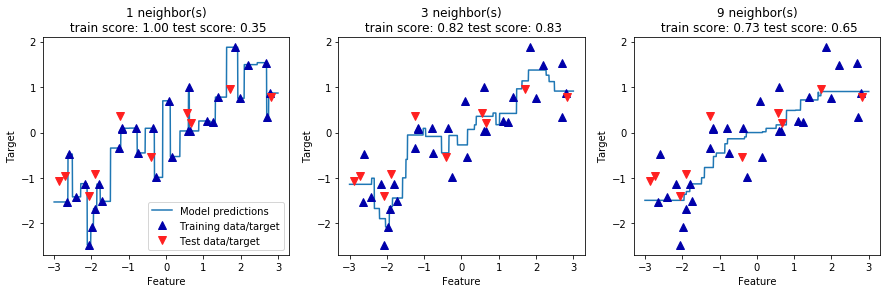

In [22]:
# Analyzing KNeighbors Regressor
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
# create 1,000 data points, evenly spaced between -3 and 3
line = np.linspace(-3, 3, 1000).reshape(-1, 1)
for n_neighbors, ax in zip([1, 3, 9], axes):
    # make predictions using 1, 3, or 9 neighbors
    reg = KNeighborsRegressor(n_neighbors=n_neighbors)
    reg.fit(X_train, y_train)
    ax.plot(line, reg.predict(line))
    ax.plot(X_train, y_train, '^', c=mglearn.cm2(0), markersize=8)
    ax.plot(X_test, y_test, 'v', c=mglearn.cm2(1), markersize=8)

    ax.set_title(
        "{} neighbor(s)\n train score: {:.2f} test score: {:.2f}".format(
            n_neighbors, reg.score(X_train, y_train),
            reg.score(X_test, y_test)))
    ax.set_xlabel("Feature")
    ax.set_ylabel("Target")
axes[0].legend(["Model predictions", "Training data/target",
                "Test data/target"], loc="best")

#

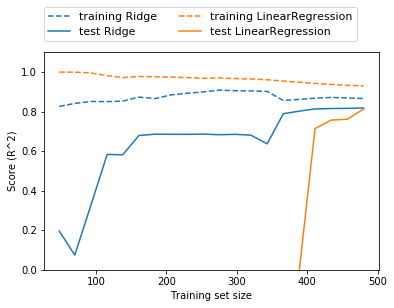

In [23]:
# Training performance ridge vs linear
mglearn.plots.plot_ridge_n_samples()